*ripy* Spectrum Example
================
Download this [example](_static/ripy-spectrum-example.ipynb)


In this example the DPD80 is used measure the frequency spectrum (0 - 40 MHz) of the incident light. To remove noise in your signal, this example captures NAVG arrays of data, fourier transforms them seperately and averages them together.

In [1]:
%pylab inline
from ripy import Device

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Opens a ripy device that is connected to your computer
d = Device()
# To open a specific device, with your device's serial number. 
#d = Device("XXXX-XXXX-XX")

# Turn on high gain mode and the antialiasing filter
d.highgain = True
d.antialias = True

In [3]:
BW = 100 # Resolution Bandwidth of the spectrum in Hz.
NAVG = 100 # Number of spectrums to average together.
RATE = 80e6 # sample rate of the DPD80
NFT = int(RATE / BW) # Number of samples transform in each average.

In [4]:
# Calculate the single-sided Power Spectral Density and average
# over NAVG collections.

# PSD will be in units of uW^2 / Hz
PSD = zeros(NFT//2 + 1)

# Calculate the frequnecies of the fourier transform
fs = fft.rfftfreq(NFT, 1. / RATE)

#Collect NAVG sets of data, fourier transform and average
for i in range(NAVG):
    data_uW = d.get_calibrated_data(NFT)
    fft_data = fft.rfft(data_uW)
    PSD += real(fft_data * conj(fft_data)) / float(NFT * RATE * NAVG) * 2
    
    if i % 10 == 0:
        print("FFTing data set: %d" %i)

# Multiplied everything by 2 for single-sided PSD, but shouldn't account for DC bin twice.
PSD[0] /= 2.

FFTing data set: 0
FFTing data set: 10
FFTing data set: 20
FFTing data set: 30
FFTing data set: 40
FFTing data set: 50
FFTing data set: 60
FFTing data set: 70
FFTing data set: 80
FFTing data set: 90


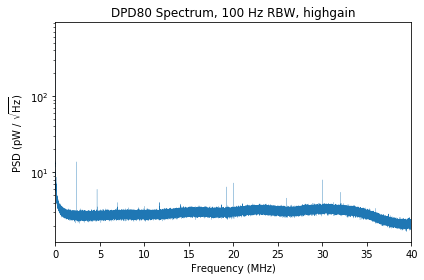

In [5]:
gain_label = "highgain" if d.highgain else "lowgain"
filter_label = "filter_on" if d.antialias else "filter_off"
BW_label = str(BW) + " Hz"

# Plot the spectrum
figure(figsize = (6,4))
title("DPD80 Spectrum, %s RBW, %s" % (BW_label, gain_label))

ylabel("PSD (pW / $\sqrt{\mathrm{Hz}}$)")
xlabel("Frequency (MHz)")
yscale('log')
xlim(0, 40)

plot(fs / 1e6, PSD**.5 * 1e6, linewidth=0.2)
tight_layout()
      
#savefig(filename + ".pdf")
#savefig(filename + ".png")

Download this [example](_static/ripy-spectrum-example.ipynb)